In [77]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#### Phase 0 : Checking data
##### In the following cell, we obtain information about the data frame using methods info() and describe() such as count , mean std min and max for the numeric columns and the non-null count and type of each column .

In [4]:
data_frame = pd.read_csv("dataset.csv")
print(data_frame.describe())
print("-----------------------")
print(data_frame.info())

         popularity  acousticness  danceability   duration_ms        energy  \
count  30000.000000  30000.000000  30000.000000  2.699000e+04  30000.000000   
mean      47.769533      0.359661      0.540929  2.466460e+05      0.556709   
std       14.512665      0.364182      0.181719  1.126005e+05      0.277856   
min        0.000000      0.000001      0.059600  1.550900e+04      0.000792   
25%       39.000000      0.029600      0.423000  1.904930e+05      0.361000   
50%       49.000000      0.205000      0.553000  2.245600e+05      0.602000   
75%       57.000000      0.710000      0.671000  2.726670e+05      0.786000   
max       99.000000      0.996000      0.977000  3.195440e+06      0.998000   

       instrumentalness      liveness      loudness   speechiness  \
count      30000.000000  30000.000000  30000.000000  30000.000000   
mean           0.180807      0.183610    -10.079862      0.083861   
std            0.329365      0.150733      6.953936      0.093366   
min         

#### Calculating the  percentage of missing data in each column : 

In [5]:
print(f"percentage of missing data in column artist_name is : {data_frame['artist_name'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column track_name is : {data_frame['track_name'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column popularity is : {data_frame['popularity'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column acousticness is : {data_frame['acousticness'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column danceability is : {data_frame['danceability'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column duration_ms is : {data_frame['duration_ms'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column energy is : {data_frame['energy'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column instrumentalness is : {data_frame['instrumentalness'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column key is : {data_frame['key'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column liveness is : {data_frame['liveness'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column loudness is : {data_frame['loudness'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column mode is : {data_frame['mode'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column speechiness is : {data_frame['speechiness'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column tempo is : {data_frame['tempo'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column valence is : {data_frame['valence'].isnull().sum()/len(data_frame.index)}")
print(f"percentage of missing data in column music_genre is : {data_frame['music_genre'].isnull().sum()/len(data_frame.index)}")

percentage of missing data in column artist_name is : 0.0498
percentage of missing data in column track_name is : 0.0
percentage of missing data in column popularity is : 0.0
percentage of missing data in column acousticness is : 0.0
percentage of missing data in column danceability is : 0.0
percentage of missing data in column duration_ms is : 0.10033333333333333
percentage of missing data in column energy is : 0.0
percentage of missing data in column instrumentalness is : 0.0
percentage of missing data in column key is : 0.0
percentage of missing data in column liveness is : 0.0
percentage of missing data in column loudness is : 0.0
percentage of missing data in column mode is : 0.0
percentage of missing data in column speechiness is : 0.0
percentage of missing data in column tempo is : 0.09776666666666667
percentage of missing data in column valence is : 0.0
percentage of missing data in column music_genre is : 0.0


#### I used KDE plot to show the density of each feature which are as shown below have Gaussian distribustion.

Text(0, 0.5, 'Density')

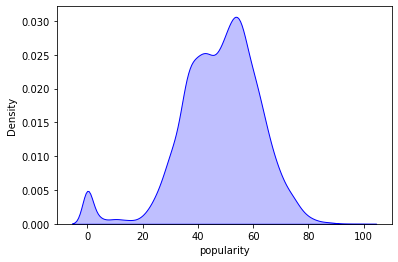

In [6]:

# set KDE plot, title and labels
ax = sns.kdeplot(data_frame.popularity, shade=True, color="b") 
#plt.title("KDE Plot of Life Expectancy between 1952 and 2007 in the World") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

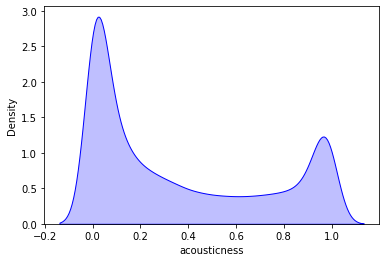

In [7]:
ax1 = sns.kdeplot(data_frame.acousticness, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

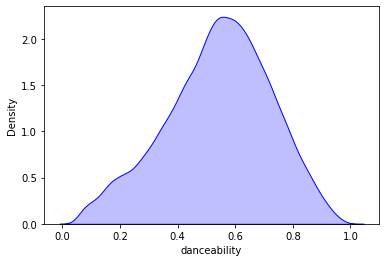

In [8]:
ax2 = sns.kdeplot(data_frame.danceability, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

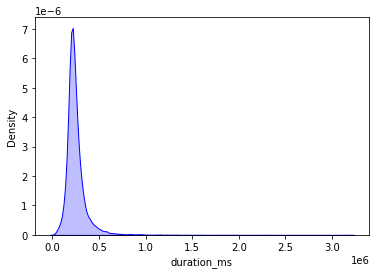

In [9]:
ax3 = sns.kdeplot(data_frame.duration_ms, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

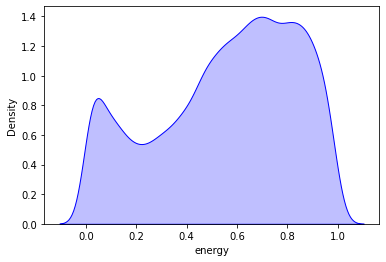

In [10]:
ax4 = sns.kdeplot(data_frame.energy, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

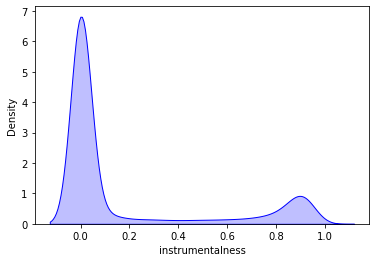

In [11]:
ax5 = sns.kdeplot(data_frame.instrumentalness, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

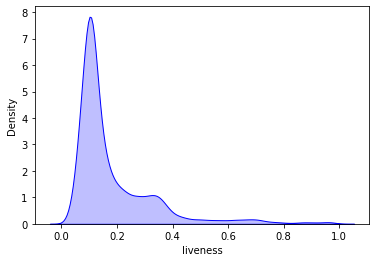

In [12]:
ax6 = sns.kdeplot(data_frame.liveness, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

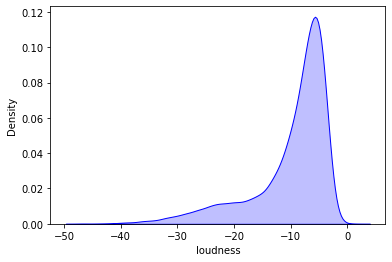

In [13]:
ax7 = sns.kdeplot(data_frame.loudness, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

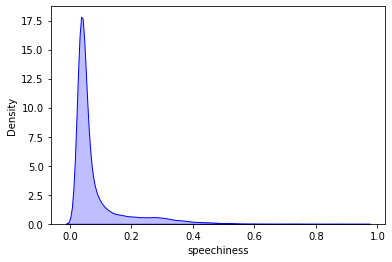

In [14]:
ax8 = sns.kdeplot(data_frame.speechiness, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

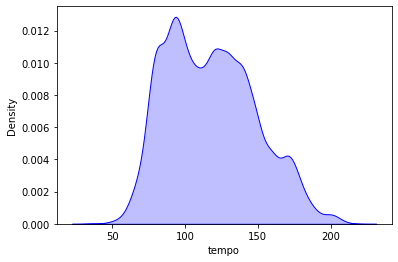

In [15]:
ax9 = sns.kdeplot(data_frame.tempo, shade=True, color="b") 
plt.ylabel("Density")


Text(0, 0.5, 'Density')

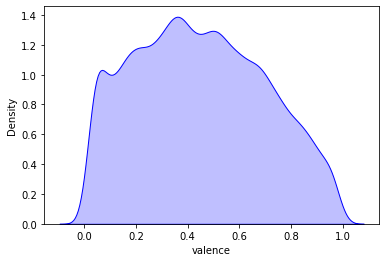

In [16]:
ax10 = sns.kdeplot(data_frame.valence, shade=True, color="b") 
plt.ylabel("Density")

mode
Major    19966
Minor    10034
dtype: int64


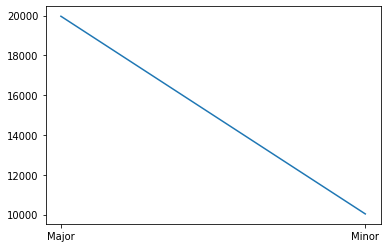

In [17]:
uniqueValues = data_frame['artist_name'].unique()
#print(uniqueValues)
dups_artist_name = data_frame.pivot_table(columns=['artist_name'], aggfunc='size')
dups_mode = data_frame.pivot_table(columns=['mode'], aggfunc='size')
print (dups_mode)
p = plt.plot(dups_mode.index, dups_mode.values)

#### phase 1 : Pre-processing
##### Q1) Methodes to handle the null values : 
##### Deleting rows or columns : Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.
##### Replacing with mean/mode : In this methode we should assign a mean/mode of the column of the null data to it . it will increase the variance of the data set but the loss of the data can be negated by this method which yields better results compared to removal of rows and columns.
##### Q2)) In the following we will use replacing the mode/mean to the null values because we dont want to lose any information about the data set.

In [18]:
data_frame['artist_name'].fillna(data_frame['artist_name'].mode()[0],inplace=True)
data_frame['duration_ms'].fillna(data_frame['duration_ms'].mean(),inplace=True)
data_frame['tempo'].fillna(data_frame['tempo'].mean(),inplace=True)


##### Q3 ) why we should use Normalization or Standardization for the numric columns:
##### we use the normalization or standardization for having all the nueric data in same range because some algorithms are sensetive to the scales of each feature .
##### Normalization : The purpose of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.
##### Standardization : Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units.
##### Q4 ) In the following we will use the Standardization because in the standardization methode it asumes that the data has the Gaussian distribution which is we have here.


In [19]:
# separate the independent and dependent variables
target = data_frame['music_genre']
X_data = data_frame.drop("music_genre", axis=1)

# standardization of dependent variables
standard = preprocessing.scale(data_frame["popularity"])
print(standard)

[-0.25974528 -0.94881009  0.22260009 ...  0.42931954 -0.39755824
 -0.81099713]


##### Q 5:
##### 2 ways of converting the categorical data to numeric data :
#####  Label Encoding : Assign numbers to the each categorical values . 
#####  Onehot Encoding : It takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.
##### In the following I use the label encoding because in the data sets there are a lot of artist names and adding this amount of columns for the artist names is unnecessary.
##### Q 6: 
##### for artist_name I used Label Encoding to make them usable.



In [20]:
labeling_encode = {"Jazz":0 ,"Alternative":1 , "Country":2 , "Rap":3 , "Rock":4 , "Classical":5 }
data_frame["music_genre"] = data_frame["music_genre"].map(labeling_encode)
labeling_encode = {"Major":0 ,"Minor":1}
data_frame["mode"] = data_frame["mode"].map(labeling_encode)
labels = dict(zip(data_frame["key"].unique(), range(len(data_frame["key"].unique()))))
data_frame['key']=data_frame['key'].map(labels)
labels = dict(zip(data_frame["artist_name"].unique(), range(len(data_frame["artist_name"].unique()))))
data_frame['artist_name']=data_frame['artist_name'].map(labels)
data_frame['popularity']=preprocessing.scale(data_frame["popularity"])
data_frame['acousticness']=preprocessing.scale(data_frame["acousticness"])
data_frame['danceability']=preprocessing.scale(data_frame["danceability"])
data_frame['duration_ms']=preprocessing.scale(data_frame["duration_ms"])
data_frame['energy']=preprocessing.scale(data_frame["energy"])
data_frame['instrumentalness']=preprocessing.scale(data_frame["instrumentalness"])
data_frame['liveness']=preprocessing.scale(data_frame["liveness"])
data_frame['loudness']=preprocessing.scale(data_frame["loudness"])
data_frame['speechiness']=preprocessing.scale(data_frame["speechiness"])
data_frame['tempo']=preprocessing.scale(data_frame["tempo"])
data_frame['valence']=preprocessing.scale(data_frame["valence"])


##### Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
##### The mutual information between two random variables X and Y can be stated formally as follows: $ I(X ; Y) = H(X) - H(Y | X) $ where $ I(X ; Y) $ is the mutual information for X and Y,$ H(X) $ is the entropy for X and $ H(X | Y) $ is the conditional entropy for X given Y. The result has the units of bits.
##### Mutual Information and Information Gain are the same thing, although the context or usage of the measure often gives rise to the different names. For example :
##### Effect of Transforms to a Dataset (decision trees): Information Gain.
##### Dependence Between Variables (feature selection): Mutual Information.
##### The relation between information gain and mutual information is the more mutual information result , the larger the gain in information gain . 
###### The explanation above is from https://machinelearningmastery.com
##### In the following cell the mutual information of the columns with the type column are calculated and plotted for the  columns that have the highest value of Mutual information.
##### As it can be seen the column artist_name have the highest gain which it means that these column can help us a lot to predict about the genre column . it make sence because these columns represents the genre which is very helpfull to predict the genre column.


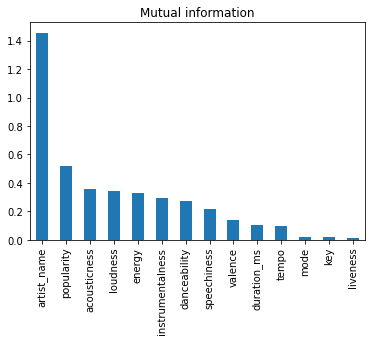

In [21]:
X1_data = data_frame.drop("music_genre", axis=1)
#X1_data = X1_data.drop("artist_name", axis=1)
X1_data = X1_data.drop("track_name", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.20, random_state = 0)
info_gain = mutual_info_regression(X_train, y_train)
info_gain = pd.Series(info_gain)
info_gain.index = X_train.columns
info_gain.sort_values(ascending = False, inplace = True)
plt.title('Mutual information')
info_gain[0:20].plot.bar()
plt.show()

#### As we can see from mutual information of each column in the above barplot , some columns like artist_name are very helping us to predict the genre cause they have high mutual information but some column are not giving us really any infromation about genre so we can just drop those columns and that would help us to calculate in less time and more efficient way ; but it some times migh be lead us to wrong answers which we would face this problem less when we have all columns but the advantage of droping them are more compare to having them so we just drop them.

In [22]:
X1_data = X1_data.drop("mode", axis=1)
X1_data = X1_data.drop("key", axis=1)
X1_data = X1_data.drop("liveness", axis=1)

#### phase 2 : predicting the target
#### Q1 & Q2 )  in that part I used 80% of the data for training and 20% for testing. Yes it is we should just pick data randomely cause randomness help us to increase accuracy for test data. No we do not need to split them equally for test data and train data but we should consider not to kind of giving a lot of weight for one of them and the splitting percentage most be logical.
#### Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

#### This is called a stratified train-test split.

#### We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

#### Q3 ) In the following I used KNN model and plot the output for hyperparameter n-neighbours and as we can see in the result as we have few neighbours we have some overfitting (mostly for train data) but when we increade neighbours we do not have this problem any more.
#### Q6 ) I caclculate Accuracy,Recall,Precision and F1 for both models below.

In [23]:
def compute_accuracy(y_pred,y_true):
    correct_predictions = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    accuracy = (correct_predictions/len(y_true)) 
    return accuracy

def knn(n,X_train,y_train,X_test,y_test):
    KNN = KNeighborsRegressor(n_neighbors = n)
    KNN.fit(X_train, y_train)
    musice_genre_KNN = KNN.predict(X_test)
    musice_genre_KNN_list = list(musice_genre_KNN)
    musice_genre_KNN_list = [round(x) for x in musice_genre_KNN_list]
    return musice_genre_KNN_list

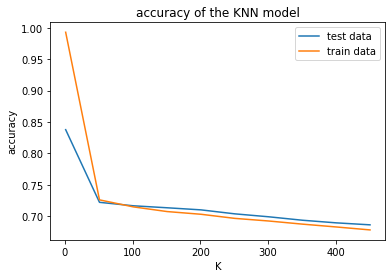

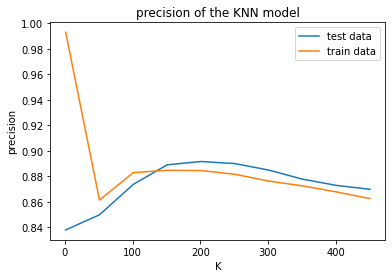

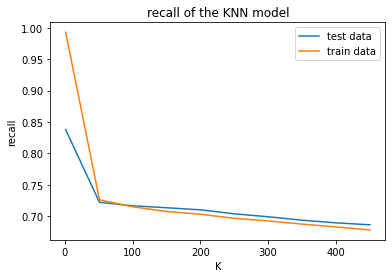

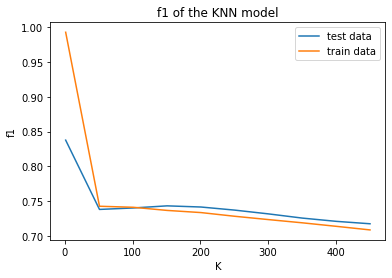

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.2, random_state = 20,stratify = data_frame['music_genre'])
accuracy1 = []
accuracy2 = []
precision1 = []
precision2 = []
recall1 = []
recall2 = []
f11 = []
f12 = []
for i in range (1,500,50):
    accuracy1.append(compute_accuracy(knn(i,X_train,y_train,X_test,y_test),y_test.tolist()))
    accuracy2.append(compute_accuracy(knn(i,X_train,y_train,X_train,y_train),y_train.tolist()))
    precision1.append(precision_score(knn(i,X_train,y_train,X_test,y_test),y_test.tolist(),average='weighted'))
    precision2.append(precision_score(knn(i,X_train,y_train,X_train,y_train),y_train.tolist(),average='weighted'))
    recall1.append(recall_score(knn(i,X_train,y_train,X_test,y_test),y_test.tolist(),average='weighted'))
    recall2.append(recall_score(knn(i,X_train,y_train,X_train,y_train),y_train.tolist(),average='weighted'))
    f11.append(f1_score(knn(i,X_train,y_train,X_test,y_test),y_test.tolist(),average='weighted'))
    f12.append(f1_score(knn(i,X_train,y_train,X_train,y_train),y_train.tolist(),average='weighted'))

plt.title("accuracy of the KNN model")
plt.plot(range (1,500,50), accuracy1,label='test data')
plt.plot(range (1,500,50), accuracy2,label='train data')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.title("precision of the KNN model")
plt.plot(range (1,500,50), precision1,label='test data')
plt.plot(range (1,500,50), precision2,label='train data')
plt.xlabel('K')
plt.ylabel('precision')
plt.legend()
plt.show()
plt.title("recall of the KNN model")
plt.plot(range (1,500,50), recall1,label='test data')
plt.plot(range (1,500,50), recall2,label='train data')
plt.xlabel('K')
plt.ylabel('recall')
plt.legend()
plt.show()
plt.title("f1 of the KNN model")
plt.plot(range (1,500,50), f11,label='test data')
plt.plot(range (1,500,50), f12,label='train data')
plt.xlabel('K')
plt.ylabel('f1')
plt.legend()
plt.show()


##### Q4) hyper parameter max_depth : The maximum depth of the tree . which in the following cell max_depth is set from 3 to the number of all features and the aaccuracy of each of these models are plotted . and it can be seen that by increasing the max_depth accuracy of both test and train data increases.
##### hyper parameter min_samples_split : The minimum number of samples required to split an internal node . which in the following cell min_samples_split is set to 3 .

c:\Users\fayya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fayya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fayya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fayya\AppData\Local

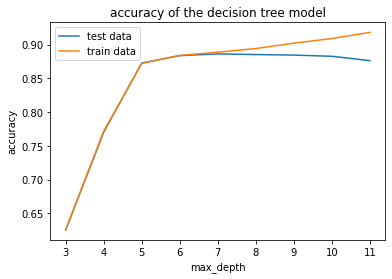

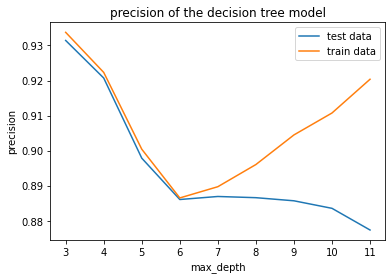

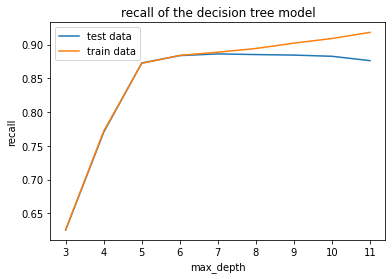

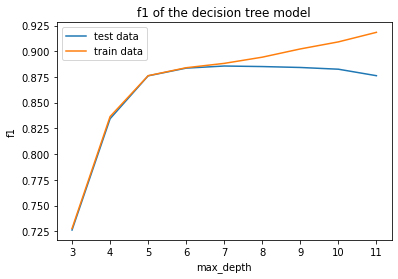

In [25]:

def decisionTree(data_frame):
    max_depth = [i for i in range(3, len(X1_data.columns)+1)]
    acc_train = [0 for i in range(3, len(X1_data.columns)+1)]
    acc_test = [0 for i in range(3, len(X1_data.columns)+1)]
    prec_train = [0 for i in range(3, len(X1_data.columns)+1)]
    prec_test = [0 for i in range(3, len(X1_data.columns)+1)]
    re_train = [0 for i in range(3, len(X1_data.columns)+1)]
    re_test = [0 for i in range(3, len(X1_data.columns)+1)]
    f1_train = [0 for i in range(3, len(X1_data.columns)+1)]
    f1_test = [0 for i in range(3, len(X1_data.columns)+1)]
    X1_data_train, X1_data_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.3, random_state = 0,stratify = data_frame['music_genre'])
    for i in range(len(max_depth)):
        decision_tree = tree.DecisionTreeClassifier(max_depth = max_depth[i], min_samples_split = 3)
        decision_tree.fit(X1_data_train, target_train)

        type_pred_test = decision_tree.predict(X1_data_test)
        type_pred_test_list = list(type_pred_test)
        type_pred_test_list = [round(x) for x in type_pred_test_list]

        type_pred_train = decision_tree.predict(X1_data_train)
        type_pred_train_list = list(type_pred_train)
        type_pred_train_list = [round(x) for x in type_pred_train_list]

        acc_test[i] = compute_accuracy(type_pred_test_list, target_test.tolist())
        acc_train[i] = compute_accuracy(type_pred_train_list, target_train.tolist())
        prec_test[i] = precision_score(type_pred_test_list, target_test.tolist(),average='weighted')
        prec_train[i] = precision_score(type_pred_train_list, target_train.tolist(),average='weighted')
        re_test[i] = recall_score(type_pred_test_list, target_test.tolist(),average='weighted')
        re_train[i] = recall_score(type_pred_train_list, target_train.tolist(),average='weighted')
        f1_test[i] = f1_score(type_pred_test_list, target_test.tolist(),average='weighted')
        f1_train[i] = f1_score(type_pred_train_list, target_train.tolist(),average='weighted')
    return max_depth , acc_test , acc_train , prec_train , prec_test , re_train , re_test , f1_train , f1_test

max_depth , acc_test , acc_train , prec_train , prec_test , re_train , re_test , f1_train , f1_test = decisionTree(data_frame)
plt.title("accuracy of the decision tree model")
plt.plot(max_depth, acc_test,label='test data')
plt.plot(max_depth, acc_train,label='train data')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.title("precision of the decision tree model")
plt.plot(max_depth, prec_test,label='test data')
plt.plot(max_depth, prec_train,label='train data')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.legend()
plt.show()
plt.title("recall of the decision tree model")
plt.plot(max_depth, re_test,label='test data')
plt.plot(max_depth, re_train,label='train data')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
plt.show()
plt.title("f1 of the decision tree model")
plt.plot(max_depth, f1_test,label='test data')
plt.plot(max_depth, f1_train,label='train data')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend()
plt.show()


#### Q5)
#### Underfitting
##### We want the model to learn from the training data, but we don’t want it to learn too much (i.e. too many patterns). One solution could be to stop the training earlier. However, this could lead the model to not learn enough patterns from the training data, and possibly not even capture the dominant trend. This case is called underfitting.
#### Overfitting
#### When we run our training algorithm on the data set, we allow the overall cost (i.e. distance from each point to the line) to become smaller with more iterations. Leaving this training algorithm run for long leads to minimal overall cost. However, this means that the line will be fit into all the points (including noise), catching secondary patterns that may not be needed for the generalizability of the model.
#### For desicion Tree model as we introduce overfitting when we increase max_depth we can see some overfitting in our data (specially in train data). And for KNN model I explain about it in above cells.
#### Q6) As we can see our models are working good and thats bacause of pre processing that we have done;  for example if we did not labeld the artist_name and did not use this column ; our accuracy would decrease about 30- 40% and all of that bacause it has a lot of information gain as we seen above. Also we used mean and mode for our missing data to get the data balance and if we did not do that we might have some miss prediction and have less accuracy with unbalanced data. And finnaly for Standardization that we did on data; In the decision tree we dont need to use normalizing or standardizing because decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features. but for other model KNN It is important to have standardize data to help us better classification and better accuracy.

##### Phase 3 : Random Forest
##### n_estimators :
##### n_estimators is simply the number of trees. The more uncorrelated trees in our forest, the closer their individual errors get to averaging out.
##### max_depth :
##### max_depth is the how many splits deep you want each tree to go.
##### min_samples_leaf :
##### The minimum number of samples required to split an internal node .

#### As we can see in the below results ; by increasing min_samples_leaf we have less samples and the accuracy would be decrease.
#### And by increasing max_depth we get more accuracy.
#### By increasing the n-estimators accuracy would decrease


In [37]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 30, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with 1 estimator is : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with 1 estimator is : {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with 1 estimator is : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with 1 estimator is : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with 1 estimator is : 0.8347392
accuracy with random forest with 1 estimator is : 0.8304
recall with random forest with 1 estimator is : 0.8304
f1 with random forest with 1 estimator is : 0.8313881638553192


In [38]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 5, max_samples = 5000, max_depth = 30, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with 5 estimator is : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with 5 estimator is : {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with 5 estimator is : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with 5 estimator is : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with 5 estimator is : 0.8100158933333333
accuracy with random forest with 5 estimator is : 0.7832
recall with random forest with 5 estimator is : 0.7832
f1 with random forest with 5 estimator is : 0.7825614427313409


In [39]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 10, max_samples = 5000, max_depth = 30, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with 10 estimator is : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with 10 estimator is : {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with 10 estimator is : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with 10 estimator is : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with 10 estimator is : 0.8067834666666667
accuracy with random forest with 10 estimator is : 0.7764
recall with random forest with 10 estimator is : 0.7764
f1 with random forest with 10 estimator is : 0.7750460542376542


In [51]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 5, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with max depth = 5 : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with max depth = 5 : {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with max depth = 5 : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with max depth = 5 : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with max depth = 5 : 0.8178357333333334
accuracy with random forest with max depth = 5 : 0.7830666666666667
recall with random forest with max depth = 5 : 0.7830666666666667
f1 with random forest with max depth = 5 : 0.7832402292703791


In [44]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 10, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with max depth = 10 : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with max depth = 10 : {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with max depth = 10 : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with max depth = 10 : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with max depth = 10 : 0.8190346666666667
accuracy with random forest with max depth = 10 : 0.8050666666666667
recall with random forest with max depth = 10 : 0.8050666666666667
f1 with random forest with max depth = 10 : 0.8057163129481292


In [54]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 100, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with max depth = 100 : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with max depth = 100: {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with max depth = 100 : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with max depth = 100 : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with max depth = 100 : 0.8380939733333334
accuracy with random forest with max depth = 100: 0.8321333333333333
recall with random forest with max depth = 100 : 0.8321333333333333
f1 with random forest with max depth = 100 : 0.8336108164176956


In [66]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 100, min_samples_split = 2)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with min_samples_split = 2 : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with min_samples_split = 2: {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with min_samples_split = 2 : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with min_samples_split = 2 : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with min_samples_split = 2 : 0.8427785600000001
accuracy with random forest with min_samples_split = 2: 0.8424
recall with random forest with min_samples_split = 2 : 0.8424
f1 with random forest with min_samples_split = 2 : 0.842560313692299


In [62]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 100, min_samples_split = 5)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with min_samples_split = 5 : {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with min_samples_split = 5: {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with min_samples_split = 5 : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with min_samples_split = 5 : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with min_samples_split = 5 : 0.8377309866666668
accuracy with random forest with min_samples_split = 5: 0.836
recall with random forest with min_samples_split = 5 : 0.836
f1 with random forest with min_samples_split = 5 : 0.8363744784704031


In [64]:
df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 100, min_samples_split = 10)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
print(f"precision with random forest with min_samples_split = 10: {precision_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"accuracy with random forest with min_samples_split = 10: {compute_accuracy(type_pred_forest_list,target_test.tolist())}")
print(f"recall with random forest with min_samples_split = 10 : {recall_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")
print(f"f1 with random forest with min_samples_split = 10 : {f1_score(type_pred_forest_list,target_test.tolist(),average='weighted')}")

precision with random forest with min_samples_split = 10: 0.8270581333333333
accuracy with random forest with min_samples_split = 10: 0.8201333333333334
recall with random forest with min_samples_split = 10 : 0.8201333333333334
f1 with random forest with min_samples_split = 10 : 0.8216052188422919


#### We can see the confusion matrix for our random forest with the best hyperbolic parameters as we obtained from last part which is the least n-estimator and min_sample_leaf and the most( if we go higher we just lose time and would not get a lot better accuracy) max_depth

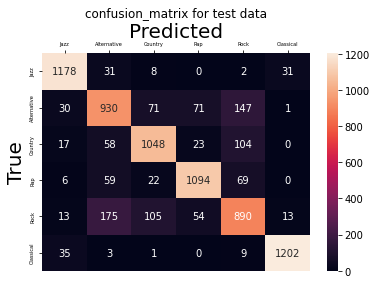

In [76]:
def plot_confusion_matrix(y_pred,y_test):
    confusion_m = confusion_matrix(y_true=y_test, y_pred=y_pred)
    ax= plt.subplot()
    sns.heatmap(confusion_m, annot=True, ax = ax, fmt = 'g'); 
    ax.set_title("confusion_matrix for test data")
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.set_ticklabels(['Jazz', 'Alternative' , 'Country' , 'Rap' , 'Rock' , 'Classical'], fontsize = 5)
    ax.xaxis.tick_top()
    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(['Jazz', 'Alternative' , 'Country' , 'Rap' , 'Rock' , 'Classical'], fontsize = 5)
    plt.show()

df2_train, df2_test, target_train, target_test = train_test_split(X1_data, data_frame['music_genre'], test_size = 0.25, random_state = 0,stratify = data_frame['music_genre'])
random_forest = RandomForestRegressor(bootstrap = True, n_estimators = 1, max_samples = 5000, max_depth = 100, min_samples_split = 2)
random_forest.fit(df2_train, target_train)
type_random_forest = random_forest.predict(df2_test)
type_pred_forest_list = list(type_random_forest)
type_pred_forest_list = [round(x) for x in type_pred_forest_list]
plot_confusion_matrix(type_pred_forest_list,target_test.tolist())